In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

|      feature      | Description | 
|------------|-----|
| satisfaction_level | Level of statisfaction on the job |
| last_evaluationTime | Number of years since evaluation |
| number_project | Number of projects employee has done for the company  |
| average_montly_hours | Average number of hours the employee worked last month |
| time_spend_company | Numbers of years worked for the company |
| work_accident | If the employeee has had a working accident |
| promotion_last_5years | If promoted last 5 years |
| department | Department the employee works |
| salary | Relative salary (low, medium, high) |

In [4]:
dataset = pd.read_csv('Human_Resources.csv')
print('Dimensie van de dataset:',dataset.shape)
dataset.head(1000)

Dimensie van de dataset: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
995,0.38,0.46,2,144,3,0,1,0,management,low
996,0.38,0.54,2,157,3,0,1,0,marketing,medium
997,0.86,0.94,5,224,5,0,1,0,marketing,medium
998,0.37,0.46,2,155,3,0,1,0,marketing,medium


In [5]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#Check if nan values
dataset[dataset.isnull().any(axis=1)]
#No nan values so all good on that part

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary


<AxesSubplot:>

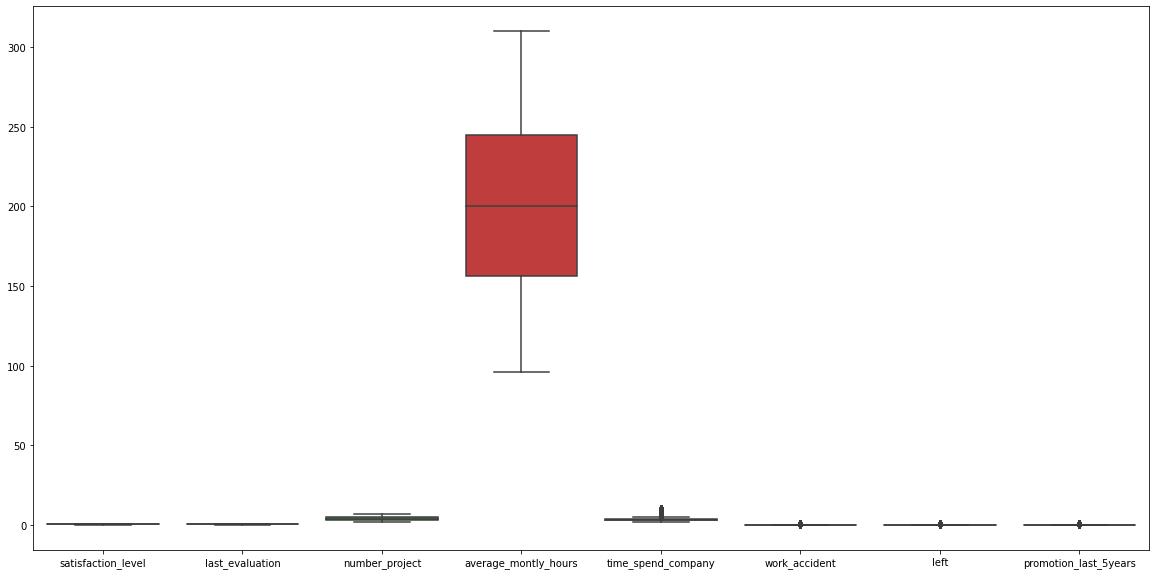

In [11]:
#Check if there are a lot of outliers
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=dataset)
#We don't see any special outliers

<AxesSubplot:xlabel='left', ylabel='count'>

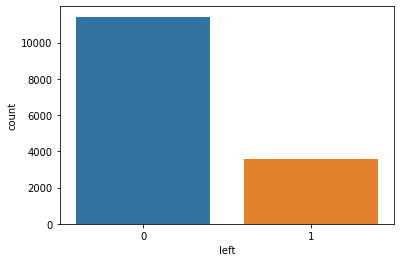

In [13]:
# Cheching the class balancedness
sns.countplot(x='left',data=dataset)
#data seems unbalanced, multiple way to fix this.

# Preprocessing 

In [14]:
# One hot encoding department and salary
#Department
dataset = pd.concat([dataset,pd.get_dummies(dataset['department'], prefix='department')],axis=1)
dataset.drop(['department'],axis=1, inplace=True)
#Salary
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary')],axis=1)
dataset.drop(['salary'],axis=1, inplace=True)
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,...,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,...,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X = dataset.drop(['left'], axis=1)
y= dataset['left'].values

In [16]:
# Spliting training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
#Min max scaler to not disturb 01 values
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Custom gridsearch to work with the poly features
C_list = [0.001,0.01,0.1,1,10,100]
solvers = ['liblinear', 'newton-cg', 'lbfgs']
degrees=[1,2,3]
best_c=0
best_solver=""
best_degree=0
best_acc=0
for g in degrees:
    poly = PolynomialFeatures(g)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    for s in solvers:
        for c in C_list:
            logreg = linear_model.LogisticRegression(C=c,solver=s,class_weight='balanced')
            logreg.fit(X_train_poly, y_train)
            y_pred = logreg.predict(X_test_poly)
            acc=accuracy_score(y_test,y_pred)*100
            if acc > best_acc:
                best_c=c
                best_solver=s
                best_acc=acc
                best_degree=g
            
print("Best C:")
print(best_c)
print("Best solver:")
print(best_solver)
print("Best degree:")
print(best_degree)
print("Geeft acc:")
print(best_acc)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best C:
100
Best solver:
liblinear
Best degree:
3
Geeft acc:
94.48


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#Using best values
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
logreg_opt = linear_model.LogisticRegression(C=best_c,solver=best_solver,class_weight='balanced')
logreg_opt.fit(X_train_poly, y_train)
y_pred = logreg_opt.predict(X_test_poly)
y_predtrain = logreg_opt.predict(X_train_poly)

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred,labels=[1,0]))

print("Accuracy (TRAIN - TEST):")
print(accuracy_score(y_train,y_predtrain)*100)
print(accuracy_score(y_test,y_pred)*100)

print("Report:")
print(classification_report(y_test,y_pred))
#We see a small bias but actually pretty good results for such unbalancedness

Confusion matrix:
[[ 817   52]
 [ 155 2726]]
Accuracy (TRAIN - TEST):
95.78629211485466
94.48
Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2881
           1       0.84      0.94      0.89       869

    accuracy                           0.94      3750
   macro avg       0.91      0.94      0.93      3750
weighted avg       0.95      0.94      0.95      3750



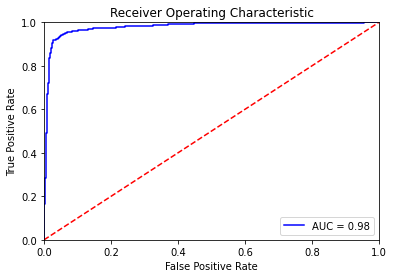

In [20]:
#ROC
import sklearn.metrics as metrics
probs = logreg_opt.predict_proba(X_test_poly)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#roc score is pretty good aswel. 
#AUC is 0.98 this means that the model has a 98% chance of classifying a case correctly

Text(0.5, 1.0, 'Precision-Recall')

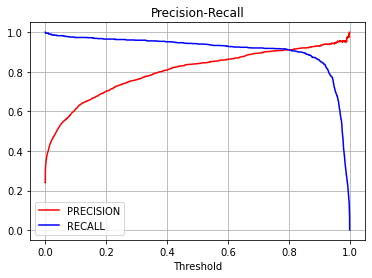

In [22]:
# In case we want more certainty that we don't lose a employee than we can lower the threshold
#We will have more false positives but less people will leave the company.
from sklearn.metrics import precision_recall_curve
prob=logreg_opt.predict_proba(X_test_poly)
precision, recall, treshold = precision_recall_curve(y_test, prob[:,1]) 

# Plotten van precision en recall 
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION') 
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid()
plt.xlabel("Threshold")
plt.legend() 
plt.title('Precision-Recall')

#We can for example lower to 0.3-0.4 this would still give decent performance

In [25]:
#Using best values
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
logreg_opt = linear_model.LogisticRegression(C=best_c,solver=best_solver,class_weight='balanced')
logreg_opt.fit(X_train_poly, y_train)
y_predtrain = logreg_opt.predict(X_train_poly)
threshold = 0.30
y_pred = (logreg.predict_proba(X_test_poly)[:, 1] > threshold).astype('float')
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred,labels=[1,0]))

print("Accuracy (TRAIN - TEST):")
print(accuracy_score(y_train,y_predtrain)*100)
print(accuracy_score(y_test,y_pred)*100)

print("Report:")
print(classification_report(y_test,y_pred))
#Now we will miss less people who want to quit. the difference isn't that big so you could discuss its not worth it

Confusion matrix:
[[ 830   39]
 [ 330 2551]]
Accuracy (TRAIN - TEST):
95.78629211485466
90.16
Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2881
           1       0.72      0.96      0.82       869

    accuracy                           0.90      3750
   macro avg       0.85      0.92      0.88      3750
weighted avg       0.92      0.90      0.91      3750

